Haberman's Survival Dataset:
    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
  
Source: https://www.kaggle.com/gilsousa/habermans-survival-data-set

Objective: Predict the Survival Status of the patients.
Features: 
    Age: The age of the patient at the time of the operation
    Year of operation: The year in which the patient undergone the operation
    Axillary Nodes: Number of positive axillary nodes detected
                    About axillary Nodes: https://jamanetwork.com/journals/jama/fullarticle/1750133
Class attribute - Survival Status: 
    1: The patient has survived for 5 or more years
    2: The patient has died within 5 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#loading haberman csv file into haberman dataframe
haberman = pd.read_csv("haberman.csv")

#(rows, columns)
print(haberman.shape)

#column names
print(haberman.columns)

#number of items in each category
#1:survived for 5 or more years 
#2:died within 5 years
#print(haberman["surv_status"].value_counts) #- this gives all the values
print(haberman["surv_status"].value_counts())


(306, 4)
Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')
1    225
2     81
Name: surv_status, dtype: int64


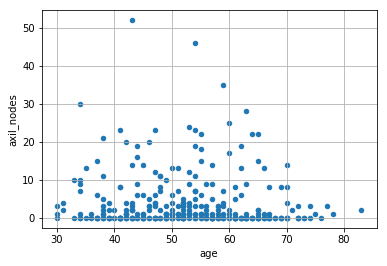

In [2]:
#2D scatter
haberman.plot(kind = "scatter", x = "age", y = "axil_nodes")
plt.grid()
plt.show()

#doesn't make any sense 

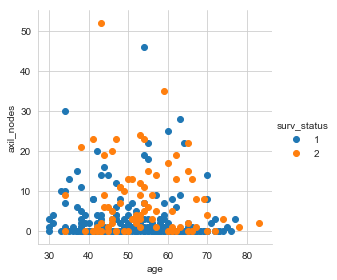

In [3]:
#let's make sense with seaborn
sb.set_style("whitegrid")
sb.FacetGrid(haberman, hue = "surv_status", height = 4).map(plt.scatter, "age", "axil_nodes").add_legend()
plt.show()

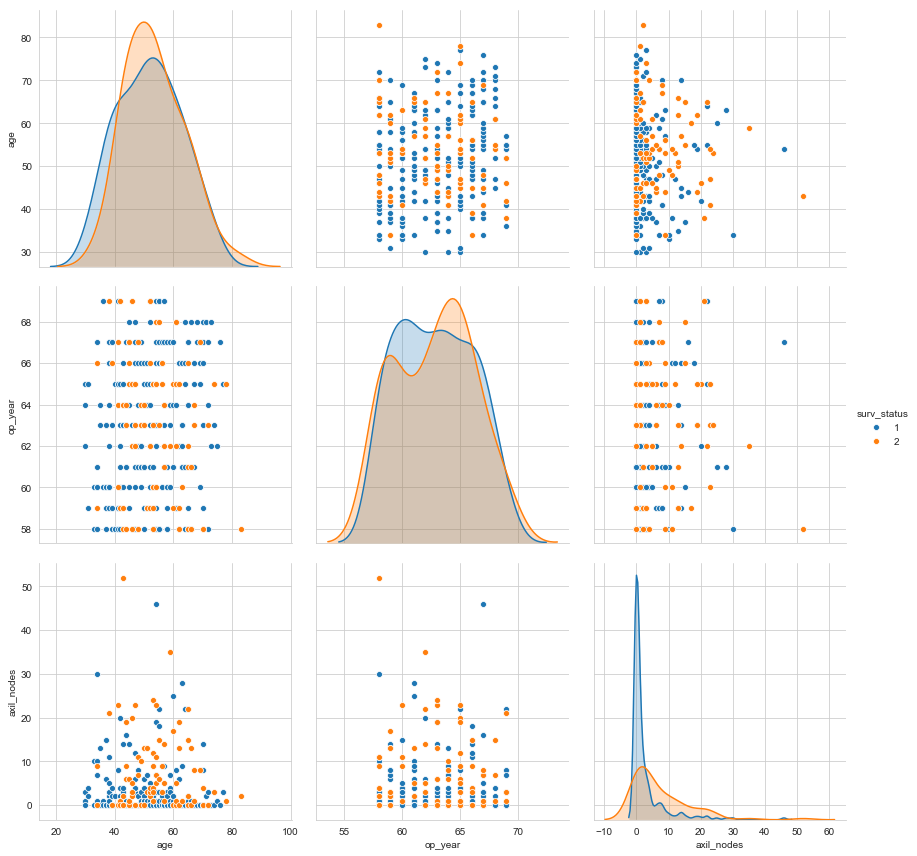

In [4]:
#pairplot
sb.set_style("whitegrid")
sb.pairplot(haberman, vars = ['age', 'op_year', 'axil_nodes'], hue = "surv_status", height = 4)
plt.show()

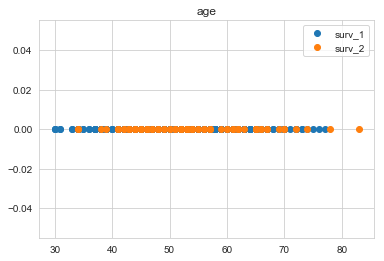

In [5]:
#1D scatter
#age

surv_1 = haberman.loc[haberman['surv_status'] == 1]
surv_2 = haberman.loc[haberman['surv_status'] == 2]
#print(surv_1)
plt.plot(surv_1['age'], np.zeros_like(surv_1['age']), 'o', label = "surv_1")
plt.plot(surv_2['age'], np.zeros_like(surv_2['age']), 'o', label = "surv_2")
plt.title('age')
plt.legend()
plt.show()

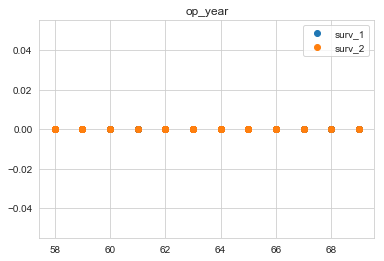

In [6]:
#1D scatter
#op_year

surv_1 = haberman.loc[haberman['surv_status'] == 1]
surv_2 = haberman.loc[haberman['surv_status'] == 2]
#print(surv_1)
plt.plot(surv_1['op_year'], np.zeros_like(surv_1['op_year']), 'o', label = "surv_1")
plt.plot(surv_2['op_year'], np.zeros_like(surv_2['op_year']), 'o', label = "surv_2")
plt.title('op_year')
plt.legend()
plt.show()

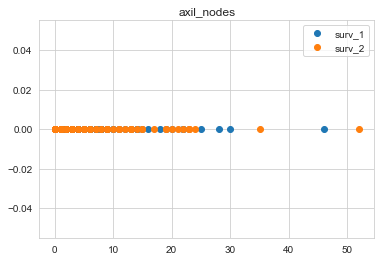

In [7]:
#1D scatter
#axil_nodes

surv_1 = haberman.loc[haberman['surv_status'] == 1]
surv_2 = haberman.loc[haberman['surv_status'] == 2]
#print(surv_1)
plt.plot(surv_1['axil_nodes'], np.zeros_like(surv_1['axil_nodes']), 'o', label = "surv_1")
plt.plot(surv_2['axil_nodes'], np.zeros_like(surv_2['axil_nodes']), 'o', label = "surv_2")
plt.title('axil_nodes')
plt.legend()
plt.show()

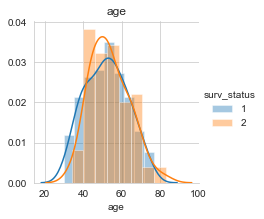

In [8]:
#Histogram
#better way of visualizing 1D scatter plot
#age
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue = 'surv_status', height = 3).map(sb.distplot, 'age').add_legend()
plt.title('age')
plt.show()

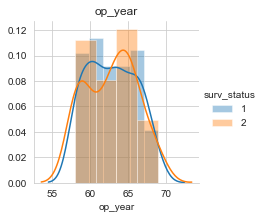

In [9]:
#Histogram
#better way of visualizing 1D scatter plot
#op_year
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue = 'surv_status', height = 3).map(sb.distplot, 'op_year').add_legend()
plt.title('op_year')
plt.show()

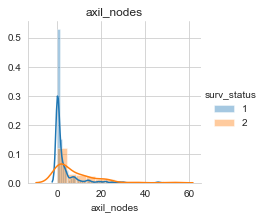

In [10]:
#Histogram
#better way of visualizing 1D scatter plot
#axil_nodes
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue = 'surv_status', height = 3).map(sb.distplot, 'axil_nodes').add_legend()
plt.title('axil_nodes')
plt.show()

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]


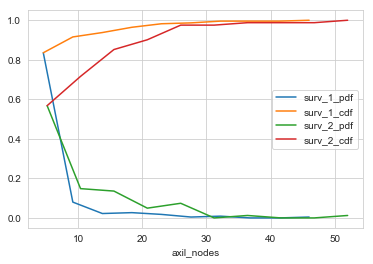

In [11]:
#PDF and CDF construction
#axil_nodes seems to have less overlap when compared to age and op_year
#So, let's plot PDF and CDF using axil_nodes
#Plotting PDF and CDF using counts and bin_edges

counts, bin_edges = np.histogram(surv_1['axil_nodes'], bins = 10, density = True)
#bins = 10 --> Takes in the minimun value  and maximum value of axil_nodes in surv_1 and divides it into 10 equal intervals
#counts --> total number of people that fall in that bin range

print(bin_edges)
print(counts)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'surv_1_pdf')
plt.plot(bin_edges[1:], cdf, label = 'surv_1_cdf')

counts, bin_edges = np.histogram(surv_2['axil_nodes'], bins = 10, density = True)
print(bin_edges)
print(counts)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'surv_2_pdf')
plt.plot(bin_edges[1:], cdf, label = 'surv_2_cdf')
plt.xlabel('axil_nodes')
plt.legend()
plt.show()

In [ ]:
#mean
